In [2]:
import pandas as pd

words = []
# with open("./data/western_names.txt") as file:
#     words = file.read().splitlines()

with open("./data/indian_names.csv", encoding="utf-8") as file:
    df = pd.read_csv(file, header=None)
    words = df.iloc[:, 0].dropna().tolist()
    words = [w.lower() for w in words if w.isalpha()]
    words = words[1:]
words[0:10]
min(len(w) for w in words)
max(len(w) for w in words)
len("".join(w for w in words)) + len(words)  # total chars from all words +len(words) for the dots

45594

In [3]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1

sorted(b.items(), key=lambda x: -x[1])[:10]

[(('s', 'h'), 1564),
 (('a', 'n'), 1441),
 (('r', 'a'), 1355),
 (('<S>', 's'), 1217),
 (('h', '<E>'), 925),
 (('<S>', 'r'), 877),
 (('<S>', 'a'), 854),
 (('h', 'a'), 828),
 (('a', 'r'), 793),
 (('n', '<E>'), 761)]

In [4]:
import torch

N = torch.zeros((27, 27), dtype=torch.int)
charList = sorted(list(set("".join(words))))

charToIndex = {ch: i + 1 for i, ch in enumerate(charList)}
charToIndex["."] = 0

indexToChar = {i: ch for ch, i in charToIndex.items()}

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[charToIndex[ch1], charToIndex[ch2]] += 1



(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

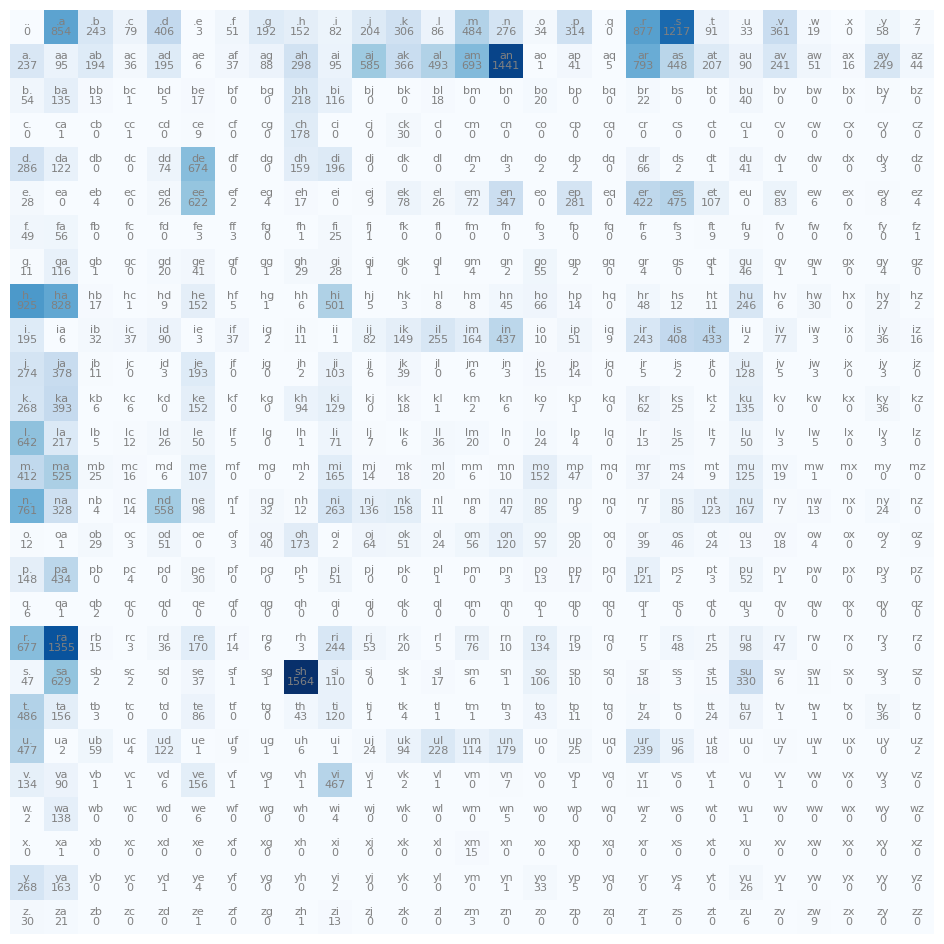

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        s = indexToChar[i] +  indexToChar[j]
        plt.text(j, i, s, ha="center", va="bottom", color="gray", size=8)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray", size=8)
plt.axis("off")

In [11]:
g = torch.Generator().manual_seed(2147483647)
P = (N + 1e-10).float() / torch.sum(N, 1, keepdim=True)


for _ in range(100):
    generated_sequence = []
    idx = 0
    while True:
        idx = torch.multinomial(
            P[idx], num_samples=1, replacement=True, generator=g
        ).item()
        generated_sequence.append(indexToChar[idx])
        if idx == 0:  # Stop if we hit the end token
            break

    print("".join(generated_sequence))

deend.
rogokuraroh.
k.
ahampajimittarerakavi.
kanda.
samitpublabhimintashishish.
kau.
sh.
redajek.
desamsadeeenkaviray.
ftbup.
hinivend.
ahiver.
depr.
bin.
sl.
p.
awaisan.
ju.
f.
ninkajkr.
desu.
mir.
t.
gaikajahudisamah.
ku.
shal.
mamanim.
ayarajen.
m.
vi.
sal.
shavim.
den.
y.
oh.
rapajanakeeeprahariken.
k.
ill.
verdeeesh.
sahakajakamanem.
k.
shichfubalchah.
charohasaj.
shashamndesak.
ranojashy.
samisashauranul.
suhyagoohara.
j.
anudeetohamoh.
ba.
radepanum.
rankahivisasam.
k.
j.
gh.
r.
dhusahilralm.
ch.
ron.
ndhay.
avn.
rit.
osulr.
mer.
deepad.
irikh.
jedeshy.
ar.
randrajatpuritooohnk.
rjkurmjamerana.
ran.
r.
sintamaamneeeerayulwabheepajepan.
r.
arirasamikaju.
mondamudewam.
rahanshinderak.
andirishul.
n.
denohi.
kar.
mav.
aratajemavirvilaanah.
she.
sukan.
shraagajaj.
veshimakavp.
anins.
rah.
an.
rajkeerderamifaraamomun.
r.
r.
j.
p.
bikitarer.
pashavitimayobhish.
panu.
som.


In [7]:
log_likelihood = 0.0
count = 0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = charToIndex[ch1]
        idx2 = charToIndex[ch2]
        pb = P[idx1, idx2]
        logPb = torch.log(pb)
        log_likelihood += logPb
        # print(f"{ch1}{ch2} {pb:.4f} {logPb:.4f}")
        count += 1

print(f"Log-likelihood: {log_likelihood:.4f}")
nll = -log_likelihood
print(f"Negative Log-likelihood: {nll:.4f}")
print(f"Avg Negative Log-likelihood: {nll/count:.4f}")

Log-likelihood: -99494.3125
Negative Log-likelihood: 99494.3125
Avg Negative Log-likelihood: 2.1822
